In [1]:
import requests
import json
import pandas as pd

In [ ]:
# response = requests.get('http://128.2.204.215:8080/user/1')
# print(response)

<Response [200]>


In [2]:


# # Replace <ip> with the actual IP address of the server
# base_url = 'http://128.2.204.215:8080/user/'

# # A list of user IDs to loop through
# user_ids = [i for i in range(1,1000000)]

# # Create a new Excel workbook and select the active sheet
# workbook = Workbook()
# sheet = workbook.active

# # Set the column headers for the sheet

# # Loop through each user ID and make a request to the server
# for index, user_id in enumerate(user_ids, start=2):
#     url = base_url + str(user_id)
#     response = requests.get(url)
    
#     # Parse the response content as JSON
#     response_dict = json.loads(response.content)
    
#     # Save the user ID and raw response in the Excel sheet
#     sheet.cell(row=index, column=1, value=user_id)
#     sheet.cell(row=index, column=2, value=response.content)
    
#     # Save the response dictionary keys and values in separate columns
#     for col_index, key in enumerate(response_dict.keys(), start=3):
#         sheet.cell(row=1, column=col_index, value=key)
#         sheet.cell(row=index, column=col_index, value=response_dict[key])
    
# # Save the workbook to a file
# workbook.save('Users.xlsx')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving movieRatedCount.csv to movieRatedCount (1).csv
Saving movies.csv to movies (1).csv
Saving userRatedCount.csv to userRatedCount (1).csv
Saving users.csv to users (1).csv


In [5]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
movies = pd.read_csv('movies.csv')
users = pd.read_csv('users.csv')
movieRatedCount = pd.read_csv('movieRatedCount.csv')
userRatedCount = pd.read_csv('userRatedCount.csv')

In [8]:
users.head()

,user_id,age,occupation,gender
0,1,34,sales/marketing,M
1,2,33,college/grad student,M
2,3,29,scientist,M
3,4,30,other or not specified,M
4,5,26,scientist,M


In [9]:
movies.head()

,id,adult,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count
0,ice+age+2002,False,59000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,17.328902,"[{'iso_3166_1': 'US', 'name': 'United States o...",2002-03-10,383257136,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,7.1,3954
1,age+of+dinosaurs+2013,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,11.785502,"[{'iso_3166_1': 'US', 'name': 'United States o...",2013-05-11,0,88,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,4.1,34
2,rhinoceros+1974,False,0,"[{'id': 35, 'name': 'Comedy'}]",en,0.083894,[],1974-01-21,0,104,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,7.5,2
3,peeping+tom+1960,False,150000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,7.229587,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1960-04-06,83957,101,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,7.6,148
4,i+spit+on+your+grave+2010,False,2000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",en,12.805294,"[{'iso_3166_1': 'US', 'name': 'United States o...",2010-06-17,572809,108,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,6.3,537


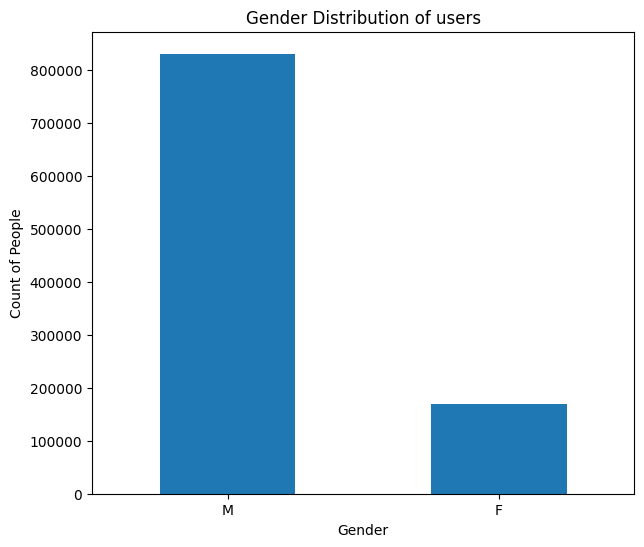

In [10]:

users['gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender")
plt.ylabel("Count of People")
plt.title("Gender Distribution of users");

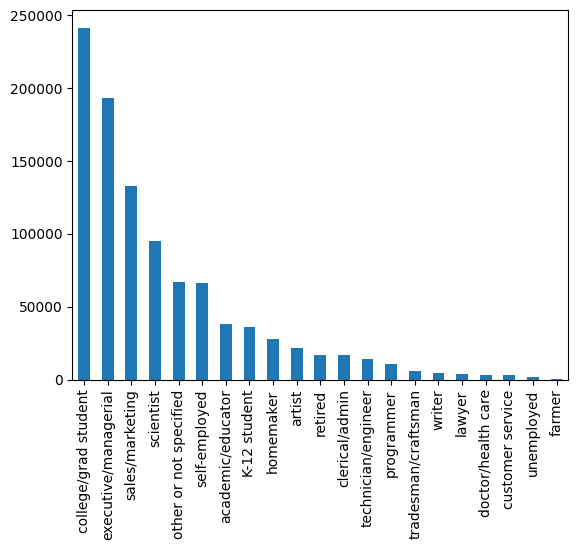

In [11]:
users['occupation'].value_counts().plot(kind='bar');

In [12]:
age_counts = users["age"].value_counts()
fig = px.bar(age_counts, title="Age of Users")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "No of Users",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

In [13]:
userRatedCount.head()

,user id,time,movie id
0,1,2,2
1,2,1,1
2,3,4,4
3,4,1,1
4,6,5,5


In [14]:
movieRatedCount.head()

,movie id,time,user id
0,GET /rate/++++++1959=2,2,2
1,GET /rate/++++++1959=3,10,10
2,GET /rate/++++++1959=4,12,12
3,GET /rate/++++++1959=5,4,4
4,GET /rate/++++2013=1,25,25


In [15]:
# define a lambda function to split the string value
get_id = lambda x: x.split('/')[2].split('=')[0]

# create the new column by applying the lambda function to the 'movie id' column
movieRatedCount['id'] = movieRatedCount['movie id'].apply(get_id)
movieRatedCount.head()

,movie id,time,user id,id
0,GET /rate/++++++1959=2,2,2,++++++1959
1,GET /rate/++++++1959=3,10,10,++++++1959
2,GET /rate/++++++1959=4,12,12,++++++1959
3,GET /rate/++++++1959=5,4,4,++++++1959
4,GET /rate/++++2013=1,25,25,++++2013


In [16]:
movieRatedCount = movieRatedCount.groupby('id')['time'].sum().reset_index()

# keep only id and time columns
movieRatedCount = movieRatedCount[['id', 'time']]

# print the updated dataframe
movieRatedCount.head()

,id,time
0,++++++1959,28
1,++++2013,13372
2,+la+mode+1993,10
3,+laventure+2008,29
4,+nos+amours+1983,37


In [18]:
# merge the two dataframes based on the 'id' column
df_combinedmovies = pd.merge(movieRatedCount, movies, on='id')

df_combinedmovies.head()

,id,time,adult,budget,genres,original_language,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count
0,++++++1959,28,False,0,"[{'id': 35, 'name': 'Comedy'}]",el,0.142537,"[{'iso_3166_1': 'GR', 'name': 'Greece'}]",1959-11-16,0,98,"[{'iso_639_1': 'el', 'name': 'ελληνικά'}]",Released,6.5,4
1,++++2013,13372,False,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 80, '...",fa,0.070407,[],2013-08-07,0,90,[],Released,10.0,1
2,+la+mode+1993,10,False,0,"[{'id': 35, 'name': 'Comedy'}]",en,0.000082,[],1993-09-10,0,82,[],Released,0.0,0
3,+laventure+2008,29,False,0,"[{'id': 18, 'name': 'Drama'}]",fr,3.282339,"[{'iso_3166_1': 'FR', 'name': 'France'}]",2008-08-29,0,104,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,5.0,13
4,+nos+amours+1983,37,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",fr,3.609326,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1983-11-16,0,102,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,5.6,37


In [20]:
# merge the two dataframes based on the 'id' column
df_combinedusers = pd.merge(userRatedCount, users, left_on='user id', right_on='user_id')

# drop the duplicate 'user_id' column
df_combinedusers = df_combinedusers.drop('user_id', axis=1)

df_combinedusers.head(10)

,user id,time,movie id,age,occupation,gender
0,1,2,2,34,sales/marketing,M
1,2,1,1,33,college/grad student,M
2,3,4,4,29,scientist,M
3,4,1,1,30,other or not specified,M
4,6,5,5,27,college/grad student,F
5,7,5,5,31,sales/marketing,M
6,10,3,3,38,executive/managerial,M
7,11,2,2,29,artist,M
8,12,3,3,27,college/grad student,M
9,13,5,5,30,technician/engineer,M


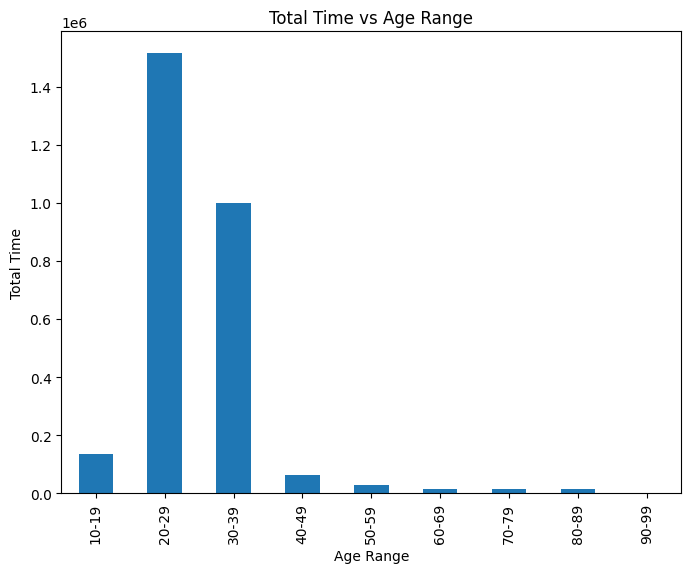

In [21]:
bins = np.arange(10, 110, 10)
labels = [f"{i}-{i+9}" for i in range(10, 100, 10)]
df_combinedusers['age_range'] = pd.cut(df_combinedusers['age'], bins=bins, labels=labels)

# group the data by age range and calculate the sum of total time for each group
grouped_df = df_combinedusers.groupby('age_range').agg({'time': 'sum'})

# plot the bar chart
grouped_df.plot(kind='bar', figsize=(8,6), legend=None)
plt.xlabel('Age Range')
plt.ylabel('Total Time')
plt.title('Total Time vs Age Range')
plt.show()

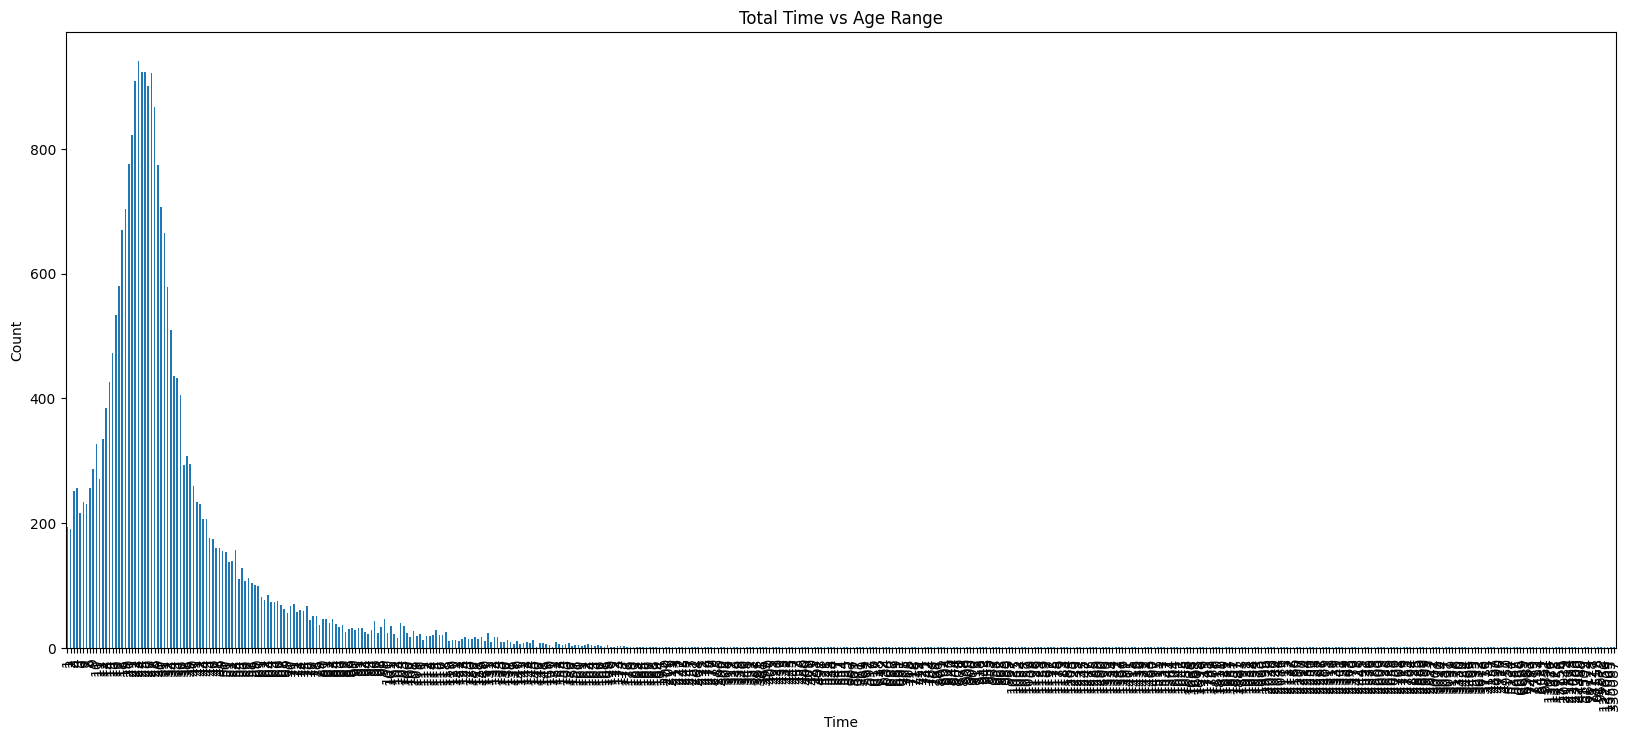

In [23]:
counts = df_combinedmovies.groupby('time').size()

plt.title('Total Time vs Age Range')
# plot the counts as a bar chart
counts.plot(kind='bar', figsize=(20,8))
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()